In [68]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from prophet import Prophet

In [69]:
# Original dataset
dfirst = pd.read_csv('Raw_Data_CSV/Total Energy Consumption By State.csv')

# Display the first and last 10 rows
display(dfirst.head(10))

,"Total energy consumption, billion Btu",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK,"59,303","70,020","76,642","78,488","82,793","85,319","100,481","112,625","119,992","154,232","179,470","198,395","211,964","194,968","199,194","229,676","251,979","289,893","320,731","296,592","291,985","275,504","405,103","433,409","478,019","469,166","498,563","493,105","514,932","570,067","577,270","596,366","620,875","614,626","613,753","694,594","709,979","701,267","715,652","719,766","735,260","726,425","723,178","722,848","765,126","788,076","738,490","714,864","642,951","630,829","629,962","632,298","620,805","587,460","586,053","602,906","582,922","590,212","593,292","595,231","629,029","688,282","724,059",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,"842,283","806,682","853,424","885,811","949,411","1,011,125","1,055,347","1,100,904","1,208,038","1,298,562","1,349,405","1,338,719","1,430,589","1,479,232","1,493,276","1,465,789","1,503,723","1,584,720","1,589,735","1,600,732","1,597,446","1,560,204","1,450,995","1,395,242","1,493,906","1,475,311","1,458,334","1,541,794","1,616,129","1,638,956","1,599,432","1,618,216","1,691,870","1,744,734","1,822,330","1,907,458","1,935,016","1,903,449","1,946,380","2,002,228","2,065,056","1,859,586","1,920,028","1,897,039","2,017,763","2,018,906","2,050,913","2,067,459","1,976,568","1,749,847","1,906,254","1,882,463","1,863,418","1,882,362","1,929,314","1,880,544","1,895,744","1,867,484","1,913,464","1,883,941","1,793,090","1,924,516","1,902,374",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AR,"417,153","423,192","446,994","474,761","515,874","515,759","553,146","581,814","620,382","664,066","691,896","682,389","725,860","801,202","777,116","763,584","818,585","867,684","863,565","849,130","834,372"

In [70]:
# Read in CSV
df = pd.read_csv('Raw_Data_CSV/Total Energy Consumption By State.csv', skiprows=2)

# Clean up the DataFrame by dropping NaN values
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='all')

# Display the first and last 10 rows
display(df.head(10))
display(df.tail(10))


,State,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AK,"59,303","70,020","76,642","78,488","82,793","85,319","100,481","112,625","119,992","154,232","179,470","198,395","211,964","194,968","199,194","229,676","251,979","289,893","320,731","296,592","291,985","275,504","405,103","433,409","478,019","469,166","498,563","493,105","514,932","570,067","577,270","596,366","620,875","614,626","613,753","694,594","709,979","701,267","715,652","719,766","735,260","726,425","723,178","722,848","765,126","788,076","738,490","714,864","642,951","630,829","629,962","632,298","620,805","587,460","586,053","602,906","582,922","590,212","593,292","595,231","629,029","688,282","724,059"
1,AL,"842,283","806,682","853,424","885,811","949,411","1,011,125","1,055,347","1,100,904","1,208,038","1,298,562","1,349,405","1,338,719","1,430,589","1,479,232","1,493,276","1,465,789","1,503,723","1,584,720","1,589,735","1,600,732","1,597,446","1,560,204","1,450,995","1,395,242","1,493,906","1,475,311","1,458,334","1,541,794","1,616,129","1,638,956","1,599,432","1,618,216","1,691,870","1,744,734","1,822,330","1,907,458","1,935,016","1,903,449","1,946,380","2,002,228","2,065,056","1,859,586","1,920,028","1,897,039","2,017,763","2,018,906","2,050,913","2,067,459","1,976,568","1,749,847","1,906,254","1,882,463","1,863,418","1,882,362","1,929,314","1,880,544","1,895,744","1,867,484","1,913,464","1,883,941","1,793,090","1,924,516","1,902,374"
2,AR,"417,153","423,192","446,994","474,761","515,874","515,759","553,146","581,814","620,382","664,066","691,896","682,389","725,860","801,202","777,116","763,584","818,585","867,684","863,565","849,130","834,372","801,407","768,781","770,586","774,080","768,517","739,016","718,177","801,908","863,033","829,674","818,074","847,533","912,973","951,014","1,002,777","1,025,669","1,039,783","1,061,551","1,083,254","1,124,742","1,078,834","1,095,221","1,083,764","1,069,232","1,094,823","1,103,087","1,108,814","1,082,242","1,019,286","1,108,901","1,115,060","1,064,957","1,092,848","1,108,345","1,043,455","1,036,998","1,043,543","1,103,282","1,078,044","1,010,754","1,054,467","1,052,517"
3,AZ,"273,431","294,660","313,581","337,213","357,961","362,858","390,820","400,280","442,172","481,370","502,886","534,558","595,492","648,638","650,824","634,126","667,849","720,003","724,401","761,540","729,272","762,578","717,832","726,638","772,368","813,921","822,415","838,472","881,963","912,149","912,983","923,446","954,555","968,200","1,020,281","1,051,644","1,112,722","1,125,743","1,185,968","1,235,022","1,289,942","1,302,277","1,298,188","1,319,583","1,372,384","1,411,766","1,458,004","1,467,180","1,433,644","1,350,479","1,403,878","1,429,424","1,403,421","1,419,110","1,422,839","1,439,724","1,462,217","1,462,699","1,474,472","1,493,085","1,435,329","1,481,293","1,526,882"
4,CA,"3,360,697","3,513,822","3,623,382","3,825,677","4,112,125","4,267,121","4,525,141","4,703,411","4,979,463","5,206,803","5,349,033","5,585,821","5,709,669","5,890,331","5,651,469","5,852,102","6,017,642","6,232,973","6,313,568","6,565,989","6,383,232","6,183,021","5,899,763","5,907,152","6,351,329","6,439,167","6,335,080","6,795,178","7,018,321","7,265,036","7,120,826","7,011,231","7,020,561","6,715,658","6,974,865","6,837,236","6,926,290","7,063,176","7,331,105","7,365,674","7,504,612","7,610,078","7,595,049","7,454,129","7,835,668","7,741,970","7,785,760","7,923,316","7,748,638","7,425,448","7,265,499","7,178,515","7,065,316","7,162,622","7,073,527","7,169,881","7,168,226","7,176,823","7,317,326","7,258,664","6,462,830","6,808,107","6,882,442"
5,CO,"417,013","453,816","459,822","457,373","488,833","498,729","521,816","543,833","611,043","635,561","663,966","676,838","740,855","786,248","768,388

,State,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
42,TN,"901,868","918,819","952,585","1,002,040","1,027,256","1,073,130","1,169,002","1,168,508","1,222,239","1,272,904","1,299,734","1,304,583","1,407,370","1,544,553","1,500,823","1,530,956","1,641,347","1,718,508","1,692,164","1,730,672","1,656,048","1,630,754","1,541,882","1,582,505","1,664,445","1,650,687","1,639,259","1,660,819","1,731,416","1,772,389","1,730,495","1,722,162","1,775,827","1,815,778","1,845,442","1,882,763","1,974,588","1,960,857","2,043,128","2,103,753","2,150,751","2,158,912","2,174,387","2,165,124","2,208,090","2,272,933","2,273,731","2,303,263","2,235,499","2,010,202","2,184,274","2,115,372","2,010,004","2,040,820","2,126,349","2,096,498","2,138,385","2,066,085","2,141,312","2,090,695","1,938,685","2,099,705","2,101,812"
43,TX,"4,360,558","4,390,700","4,574,179","4,826,435","4,940,057","5,130,088","5,473,345","5,780,021","6,168,197","6,536,713","6,800,662","7,100,513","7,484,526","8,104,240","7,935,781","7,353,715","7,688,266","8,351,949","8,780,868","9,148,063","9,217,160","8,985,609","8,273,319","8,192,171","8,735,160","8,824,053","8,816,504","9,079,399","9,671,414","9,919,203","10,079,993","10,080,020","10,236,320","10,339,357","10,653,346","10,800,158","11,572,187","11,972,410","12,151,583","11,778,877","12,133,169","11,927,024","12,216,724","12,006,762","12,047,526","11,505,184","11,632,201","11,711,373","11,153,042","10,745,617","11,423,420","11,627,656","11,657,497","12,398,030","12,360,173","12,477,122","12,630,351","12,738,502","13,544,283","13,724,994","12,974,842","13,712,230","13,780,584"
44,UT,"297,816","295,102","304,207","305,867","328,529","334,068","345,393","339,353","359,857","389,180","390,387","408,040","420,848","450,046","464,636","471,087","501,641","478,962","501,158","516,471","494,529","467,798","454,466","477,021","491,118","488,948","459,147","452,427","517,229","526,248","535,789","564,864","551,440","575,833","586,381","635,710","664,944","678,299","701,774","693,588","740,298","710,796","690,668","701,636","732,463","757,641","775,074","778,088","764,160","736,113","746,108","779,115","776,014","813,530","784,843","787,248","788,797","798,502","818,984","831,962","801,446","821,273","848,682"
45,VA,"832,709","834,806","861,694","917,827","945,535","1,018,832","1,089,208","1,105,033","1,164,157","1,198,647","1,241,013","1,281,610","1,334,357","1,392,677","1,334,947","1,310,844","1,397,442","1,450,021","1,470,097","1,523,603","1,485,275","1,469,642","1,446,464","1,498,929","1,580,295","1,619,492","1,700,064","1,797,316","1,877,896","1,909,264","1,947,533","1,953,955","1,982,330","2,056,463","2,081,090","2,146,979","2,185,166","2,186,090","2,224,990","2,286,540","2,392,470","2,322,135","2,345,695","2,414,082","2,540,836","2,616,315","2,555,214","2,616,162","2,513,956","2,395,340","2,497,147","2,376,219","2,316,403","2,386,730","2,442,590","2,404,230","2,382,831","2,361,210","2,450,678","2,418,279","2,223,267","2,373,207","2,427,849"
46,VT,"66,721","70,058","72,746","72,658","70,042","80,804","88,469","91,481","97,423","102,983","109,479","112,832","119,600","122,307","112,344","110,238","127,498","126,197","130,588","127,700","121,597","116,913","110,606","118,391","128,061","130,508","124,431","133,973","141,384","138,924","120,223","128,363","134,610","132,284","132,305","129,962","135,643","141,458","131,927","131,361","143,500","144,410","143,801","146,617","155,951","154,543","151,155","151,623","140,061","151,016","149,982","145,735","126,801","134,337","137,295","136,505","130,827","129,546","133,404","132,867","119,310","122,094","124,779"
47,WA,"765,416","781,340","815,155","856,629","914,648","946,205","1,009,305","1,055,494","1,154,184","1,230,966

In [71]:
# Set Data Range to include data from 1970 to 2022
columns_to_keep = ['State'] + list(map(str, range(1970, 2023)))
df_filtered = df[columns_to_keep]

# Remove commas from the numeric columns and convert them to numeric
for col in df_filtered.columns[1:]:
    df_filtered.loc[:, col] = pd.to_numeric(df_filtered[col].str.replace(',', ''), errors='coerce')

# Conversion factor from BTU to kWh
BTU_to_kWh = 0.00029307107

# Apply the conversion to all numeric columns (from 1970 to 2022)
for col in df_filtered.columns[1:]:
    df_filtered.loc[:, col] = df_filtered[col] * BTU_to_kWh

# Display the updated DataFrame
df_filtered.head()


,State,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AK,52.597465,58.143835,62.120516,57.13948,58.377999,67.311391,73.847755,84.959252,93.996977,86.922535,85.572356,80.742252,118.72397,127.019639,140.09354,137.498982,146.114392,144.51481,150.911672,167.070146,169.181137,174.777622,181.960501,180.129099,179.873248,203.565407,208.074305,205.52107,209.736897,210.942592,215.483435,212.894152,211.94255,211.845837,224.236296,230.962277,216.430054,209.505957,188.430338,184.87773,184.623637,185.308251,181.939986,172.167531,171.75518,176.694307,170.837574,172.974062,173.876721,174.444986,184.350202,201.715542,212.200746
1,AL,395.471567,392.33981,419.264249,433.520105,437.635995,429.580351,440.697709,464.435586,465.905337,469.12824,468.165208,457.250656,425.244657,408.905066,437.82063,432.370973,427.395506,451.855217,473.640655,480.330589,468.747248,474.252295,495.838151,511.33106,534.072203,559.020757,567.09721,557.845835,570.427669,586.795102,605.208172,544.990859,562.70466,555.96725,591.347961,591.682942,601.063267,605.912421,579.274899,512.829533,558.667899,551.695446,546.113907,551.665845,565.426118,551.133042,555.587723,547.305534,560.780942,552.128605,525.502805,564.019963,557.530784
2,AR,202.774701,199.988474,212.728567,234.809127,227.750218,223.78438,239.903582,254.293078,253.085919,248.855438,244.530295,234.869207,225.30747,225.836464,226.860454,225.2301,216.58421,210.476902,235.016036,252.930005,243.153447,239.753823,248.387403,267.565974,278.714691,293.884928,300.593911,304.730316,311.109887,317.470409,329.629341,316.175035,320.97759,317.619875,313.360966,320.860948,323.282887,324.961305,317.173821,298.723239,324.986803,326.791827,312.108087,320.282133,324.823855,305.806473,303.914113,305.832264,323.340036,315.943509,296.222756,309.033772,308.462283
3,AZ,147.381338,156.663485,174.521478,190.097033,190.737686,185.843985,195.727221,211.01205,212.300976,223.185343,213.728525,223.48955,210.375792,212.956576,226.358716,238.536698,241.026044,245.731886,258.47784,267.324483,267.568905,270.635307,279.752455,283.75141,299.014844,308.206432,326.106627,329.922706,347.572911,361.949219,378.044682,381.659714,380.461346,386.731602,402.206047,413.747772,427.298792,429.988012,420.159581,395.786326,411.436028,418.922821,411.302094,415.900086,416.992948,421.941453,428.533501,428.674761,432.125087,437.580019,420.653406,434.124124,447.484942
4,CA,1567.646825,1637.042537,1673.338803,1726.285609,1656.282067,1715.081795,1763.59678,1826.704066,1850.324129,1924.301422,1870.740632,1812.06458,1729.049855,1731.215357,1861.390786,1887.133563,1856.628674,1991.470087,2056.866845,2129.171874,2086.908095,2054.788971,2057.523324,1968.165076,2044.131149,2003.79607,2029.895221,2070.012548,2148.534787,2158.66596,2199.384669,2230.293702,2225.889137,2184.589562,2296.407605,2268.947432,2281.781014,2322.094698,2270.90163,2176.183991,2129.307566,2103.815072,2070.63972,2099.157294,2073.046127,2101.284696,2100.799664,2103.319196,2144.49656,2127.304425,1894.068503,1995.259203,2017.044641


In [72]:
# Full mapping of states to U.S. regions
state_to_region = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 'RI': 'Northeast',
    'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',

    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest',
    'ND': 'Midwest', 'SD': 'Midwest',

    # Southeast
    'DE': 'Southeast', 'FL': 'Southeast', 'GA': 'Southeast', 'MD': 'Southeast', 'NC': 'Southeast',
    'SC': 'Southeast', 'VA': 'Southeast', 'WV': 'Southeast', 'AL': 'Southeast', 'KY': 'Southeast',
    'MS': 'Southeast', 'TN': 'Southeast', 'AR': 'Southeast', 'LA': 'Southeast',

    # Southwest
    'AZ': 'Southwest', 'NM': 'Southwest', 'OK': 'Southwest', 'TX': 'Southwest',

    # West
    'AK': 'West', 'CA': 'West', 'CO': 'West', 'HI': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West',
    'OR': 'West', 'UT': 'West', 'WA': 'West', 'WY': 'West'
}

# Shaping for displaying Regions
df_state_to_region = pd.DataFrame(list(state_to_region.items()), columns=['State', 'Region'])

num_columns = 5

padding_size = (num_columns * 2) - (len(df_state_to_region.values) % (num_columns * 2))
padded_values = np.pad(df_state_to_region.values, ((0, padding_size), (0, 0)), constant_values=np.nan)

reshaped_data = pd.DataFrame(padded_values.reshape(-1, num_columns * 2), 
                             columns=['State 1', 'Region 1', 'State 2', 'Region 2', 'State 3', 'Region 3', 'State 4', 'Region 4', 'State 5', 'Region 5'])

# Display the reshaped DataFrame
display(reshaped_data.head(10))

,State 1,Region 1,State 2,Region 2,State 3,Region 3,State 4,Region 4,State 5,Region 5
0,CT,Northeast,ME,Northeast,MA,Northeast,NH,Northeast,RI,Northeast
1,VT,Northeast,NJ,Northeast,NY,Northeast,PA,Northeast,IL,Midwest
2,IN,Midwest,MI,Midwest,OH,Midwest,WI,Midwest,IA,Midwest
3,KS,Midwest,MN,Midwest,MO,Midwest,NE,Midwest,ND,Midwest
4,SD,Midwest,DE,Southeast,FL,Southeast,GA,Southeast,MD,Southeast
5,NC,Southeast,SC,Southeast,VA,Southeast,WV,Southeast,AL,Southeast
6,KY,Southeast,MS,Southeast,TN,Southeast,AR,Southeast,LA,Southeast
7,AZ,Southwest,NM,Southwest,OK,Southwest,TX,Southwest,AK,West
8,CA,West,CO,West,HI,West,ID,West,MT,West
9,NV,West,OR,West,UT,West,WA,West,WY,West


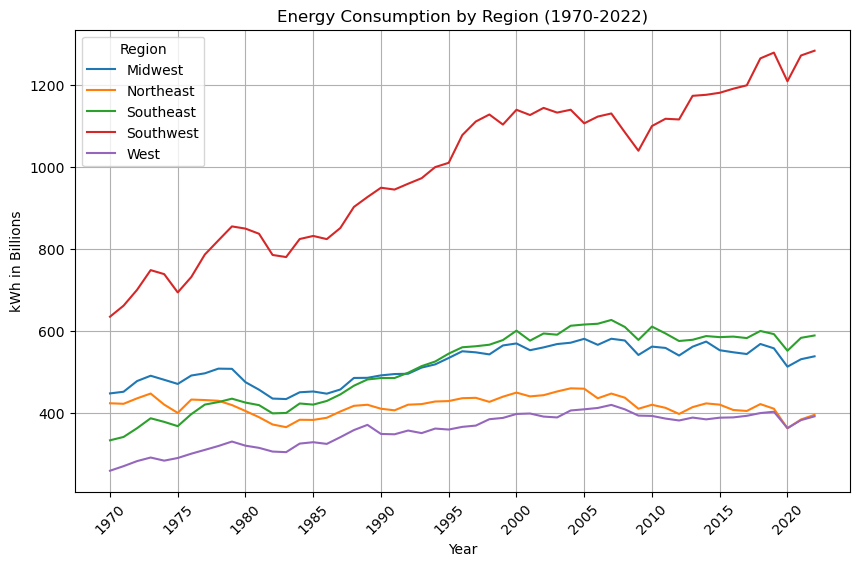

In [73]:
# Calculating the Average by Region
state_to_region
df_filtered = df_filtered.copy()
df_filtered['State'] = df_filtered['State'].str.strip()
df_filtered.loc[:, 'Region'] = df_filtered['State'].map(state_to_region)
columns_to_group = ['Region'] + list(map(str, range(1970, 2023)))
regional_avg_years = df_filtered[columns_to_group].groupby('Region').mean()

# Transpose the DataFrame to have years as the index for easier plotting
regional_avg_years = regional_avg_years.T
plt.figure(figsize=(10,6))

# Plot for each region
for region in regional_avg_years.columns:
    plt.plot(regional_avg_years.index, regional_avg_years[region], label=region)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('kWh in Billions')
plt.title('Energy Consumption by Region (1970-2022)')
plt.legend(title='Region')
plt.grid(True)

# Rotate x-axis labels and adjust the tick frequency
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))  # Shows for every 5 years

# Show the plot
plt.show()


,State,2022
43,TX,4038.690498
4,CA,2017.044641
9,FL,1267.528568
18,LA,1244.37566
38,PA,1095.173472
14,IL,1077.225799
35,OH,1026.690089
34,NY,1011.879743
10,GA,831.216375
22,MI,793.296788


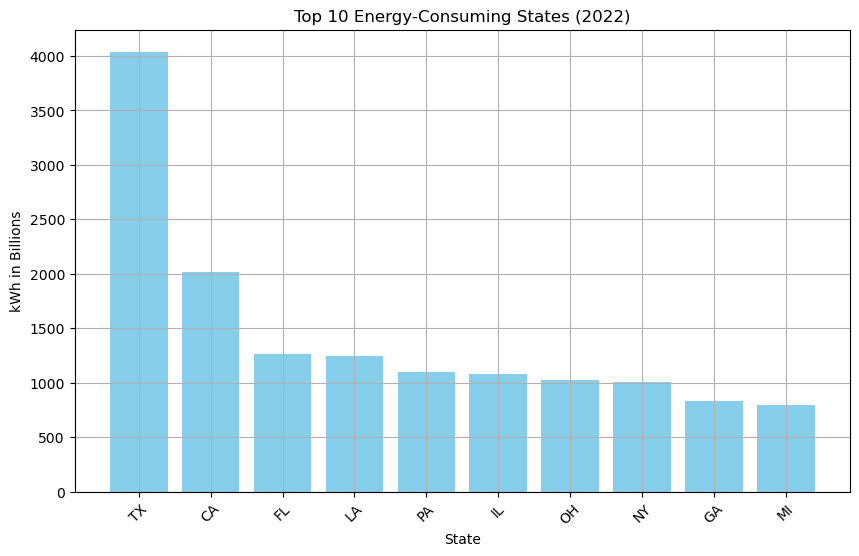

In [74]:
# Filter out the 'US' row from the DataFrame
df_filtered_no_us = df_filtered[df_filtered['State'] != 'US']

# Sort the DataFrame by energy consumption in 2022 and select the top 10 states
top_10_states = df_filtered_no_us[['State', '2022']].sort_values(by='2022', ascending=False).head(10)

# Display the top 10 states
display(top_10_states)

# Show the plot
plt.figure(figsize=(10,6))
plt.bar(top_10_states['State'], top_10_states['2022'], color='skyblue')
plt.xlabel('State')
plt.ylabel('kWh in Billions')
plt.title('Top 10 Energy-Consuming States (2022)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


,State,2022
46,VT,36.569115
7,DC,41.336502
39,RI,54.701715
11,HI,79.230298
8,DE,80.534758
30,NH,87.108928
21,ME,98.275522
41,SD,105.025535
26,MT,115.84777
50,WY,145.410728


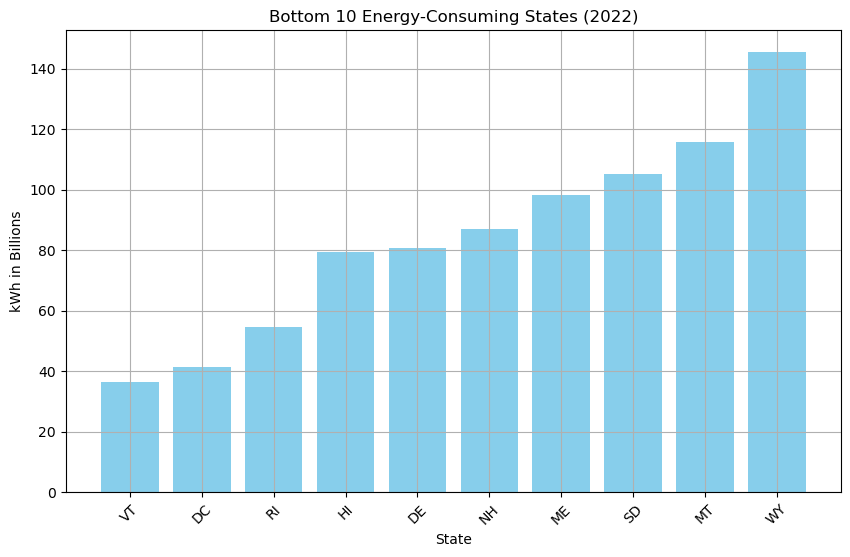

In [75]:
# Sort the DataFrame by energy consumption in 2022 and select the bottom 10 states
bottom_10_states = df_filtered_no_us[['State', '2022']].sort_values(by='2022', ascending=True).head(10)

# Display the bottom 10 states
display(bottom_10_states)

# Show the plot
plt.figure(figsize=(10,6))
plt.bar(bottom_10_states['State'], bottom_10_states['2022'], color='skyblue')
plt.xlabel('State')
plt.ylabel('kWh in Billions')
plt.title('Bottom 10 Energy-Consuming States (2022)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [76]:
# Prophet Preparation
df_for_prophet = regional_avg_years.reset_index()
df_for_prophet = df_for_prophet.melt(id_vars=['index'], var_name='Region', value_name='Energy')
df_for_prophet.rename(columns={'index': 'ds', 'Energy': 'y'}, inplace=True)


# Prediction dictionaries
models = {}
forecasts = {}

# Prophet predictions
for region in df_for_prophet['Region'].unique():
    df_region = df_for_prophet[df_for_prophet['Region'] == region][['ds', 'y']]
    
    model = Prophet()
    
    model.fit(df_region)
    
    future = model.make_future_dataframe(periods=13, freq='YE')  # 13 years from 2022 to 2035
    
    forecast = model.predict(future)
    
    models[region] = model
    forecasts[region] = forecast

20:14:40 - cmdstanpy - INFO - Chain [1] start processing
20:14:40 - cmdstanpy - INFO - Chain [1] done processing
20:14:40 - cmdstanpy - INFO - Chain [1] start processing
20:14:40 - cmdstanpy - INFO - Chain [1] done processing
20:14:40 - cmdstanpy - INFO - Chain [1] start processing
20:14:40 - cmdstanpy - INFO - Chain [1] done processing
20:14:40 - cmdstanpy - INFO - Chain [1] start processing
20:14:41 - cmdstanpy - INFO - Chain [1] done processing
20:14:41 - cmdstanpy - INFO - Chain [1] start processing
20:14:41 - cmdstanpy - INFO - Chain [1] done processing


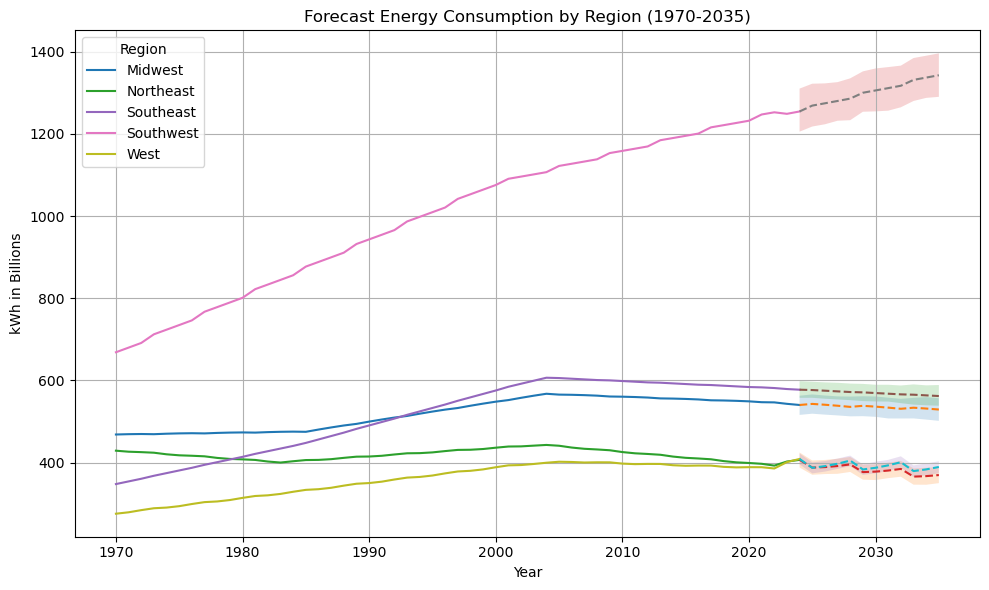

In [77]:
plt.figure(figsize=(10, 6))

# Plotting historical (1970–2022) and forecast (2023–2035)
for region in df_for_prophet['Region'].unique():
    forecast = forecasts[region]
    
    # Historical and forecast separation
    forecast_historical = forecast[forecast['ds'].dt.year <= 2023]
    forecast_future = forecast[forecast['ds'].dt.year >= 2023]
    
    # Ploting historical data (1970–2022)
    plt.plot(forecast_historical['ds'], forecast_historical['yhat'], label=f'{region}', linestyle='solid')
    
    # Plotting predictions from 2023 onwards
    plt.plot(forecast_future['ds'], forecast_future['yhat'], linestyle='dashed')
    
    # Plotting uncertainty
    plt.fill_between(forecast_future['ds'], forecast_future['yhat_lower'], forecast_future['yhat_upper'], alpha=0.2)

# Plot details
plt.xlabel('Year')
plt.ylabel('kWh in Billions')
plt.title('Forecast Energy Consumption by Region (1970-2035)')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()